# Data science project in Python

For the 4 species gff files store in the `data/` folder (mouse: `GRCm38.gff3`, human: `GRCh38.gff3`, zebrafish: `GRCz11.gff3` and panda: `AilMel.gff3`), load these files into a DataFrame, filter the exons, and calculate their length, their GC content as well as their molecular weigth. Store these calculations into new columns in their respective DataFrame. Plot these three values for the four species onto three graphs using a boxplot.

Start by working with the mouse data for exploratory analysis, working through the problem steps by steps. Then, create a re-usable function to apply the analysis onto all datasets. Load all four datasets and apply the newly created function to calculate the new values. After having all DataFrames with the new three columns, visualise the data onto three boxplot graphs.

Present the results into a Jupyter notebook, using Pandas, Matplotlib and Biopython. Write reusable and modular code as much as possible using functions.

In [1]:
import pandas
from Bio import SeqIO
from Bio import Entrez
from Bio.SeqUtils import GC, molecular_weight

In [2]:
def get_gc_and_mw_from_gbid(id='NM_177676.6'):
    Entrez.email = 'A.N.Other@example.com' # Always tell NCBI who you are
    handle = Entrez.efetch(db="nucleotide", id=id, rettype="gb")
    seq_record = SeqIO.read(handle, "gb")
    handle.close()
    return GC(seq_record.seq), molecular_weight(seq_record.seq)

In [3]:
print(get_gc_and_mw_from_gbid('NM_177676.6'))

(52.09737827715356, 829310.7034000154)


In [4]:
def get_gc_and_mw_from_gbids(df_ids):
    gcs = []
    mws = []
    for i in df_ids:
        gc, mw = get_gc_and_mw_from_gbid(i)
        gcs.append(gc)
        mws.append(mw)
    return gcs, mws

## Working with mouse data: exploratory analysis

- remove rows with null values
- filter all exons
- calculate GC contents and molecular weights

In [5]:
mouse = pandas.read_csv('data/GRCm38.gff3', sep='\t')
mouse.head()

,seqid,source,type,start,end,score,strand,phase,attributes,gbid
0,NC_000073.6,Gnomon,CDS,49420174,49420340,.,+,1,ID=cds30916;Parent=rna43633;Dbxref=GeneID:7828...,XP_006541352.1
1,NC_000067.6,Gnomon,CDS,64607740,64608137,.,-,2,"ID=cds1286;Parent=rna1815;Dbxref=GeneID:67099,...",XP_006496267.1
2,NC_000071.6,BestRefSeq,exon,24544129,24544373,.,-,.,ID=id325971;Parent=rna28488;Dbxref=GeneID:2310...,NM_177676.6
3,NC_000074.6,Gnomon,exon,71655663,71655741,.,-,.,ID=id568467;Parent=rna50916;Dbxref=GeneID:3820...,XM_017312883.1
4,NC_000068.7,Gnomon,CDS,135932249,135932302,.,+,1,ID=cds9263;Parent=rna13273;Dbxref=GeneID:18798...,XP_006499009.1


In [6]:
mouse.dropna(inplace=True)
print(mouse.type.unique())

['CDS' 'exon' 'mRNA' 'ncRNA' 'transcript' 'primary_transcript']


In [7]:
exon_mouse = mouse[mouse['type']=='exon']

In [8]:
exon_mouse.head()

,seqid,source,type,start,end,score,strand,phase,attributes,gbid
2,NC_000071.6,BestRefSeq,exon,24544129,24544373,.,-,.,ID=id325971;Parent=rna28488;Dbxref=GeneID:2310...,NM_177676.6
3,NC_000074.6,Gnomon,exon,71655663,71655741,.,-,.,ID=id568467;Parent=rna50916;Dbxref=GeneID:3820...,XM_017312883.1
7,NC_000073.6,Gnomon,exon,118329486,118329612,.,+,.,ID=id520282;Parent=rna46416;Dbxref=GeneID:1026...,XR_378454.2
8,NC_000076.6,Gnomon,exon,5175722,5175928,.,-,.,ID=id673061;Parent=rna60010;Dbxref=GeneID:6400...,XM_017314047.1
9,NC_000083.6,Gnomon,exon,24585923,24586066,.,+,.,ID=id1054336;Parent=rna94586;Dbxref=GeneID:187...,XM_017317334.1


In [9]:
small_exon_mouse = exon_mouse.iloc[:9,]

In [10]:
gcs, mws = get_gc_and_mw_from_gbids(small_exon_mouse['gbid'])

In [11]:
small_exon_mouse.insert(len(small_exon_mouse.columns), 'len', small_exon_mouse['end'] - small_exon_mouse['start'] + 1)

In [12]:
small_exon_mouse.insert(len(small_exon_mouse.columns), 'gc', gcs)

In [13]:
small_exon_mouse.insert(len(small_exon_mouse.columns), 'mw', mws)

In [14]:
small_exon_mouse.head()

,seqid,source,type,start,end,score,strand,phase,attributes,gbid,len,gc,mw
2,NC_000071.6,BestRefSeq,exon,24544129,24544373,.,-,.,ID=id325971;Parent=rna28488;Dbxref=GeneID:2310...,NM_177676.6,245,52.097378,8.293107e+05
3,NC_000074.6,Gnomon,exon,71655663,71655741,.,-,.,ID=id568467;Parent=rna50916;Dbxref=GeneID:3820...,XM_017312883.1,79,57.063197,2.164587e+06
7,NC_000073.6,Gnomon,exon,118329486,118329612,.,+,.,ID=id520282;Parent=rna46416;Dbxref=GeneID:1026...,XR_378454.2,127,49.659864,3.169640e+05
8,NC_000076.6,Gnomon,exon,5175722,5175928,.,-,.,ID=id673061;Parent=rna60010;Dbxref=GeneID:6400...,XM_017314047.1,207,50.390277,8.345749e+06
9,NC_000083.6,Gnomon,exon,24585923,24586066,.,+,.,ID=id1054336;Parent=rna94586;Dbxref=GeneID:187...,XM_017317334.1,144,56.730498,4.384230e+06


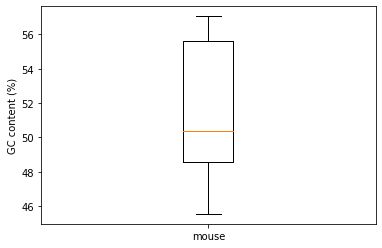

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.boxplot([small_exon_mouse['gc']], labels=['mouse'])
plt.ylabel('GC content (%)')
plt.show()

## Creating a re-usable function to apply the analysis onto other datasets

In [ ]:
def get_exons(data):
    data.dropna(inplace=True)
    exons = data[data['type']=='exon']
    exons = exons[:9]
    gcs, mws = get_gc_and_mw_from_gbids(exons['gbid'])
    exons.insert(len(exons.columns), 'len', exons['end'] - exons['start'] + 1)
    exons.insert(len(exons.columns), 'gc', gcs)
    exons.insert(len(exons.columns), 'mw', mws)
    return exons

## Loading all four datasets and calculating new values

In [ ]:
mouse = pandas.read_csv('data/GRCm38.gff3', sep='\t')
mouse_small_exons = get_exons(mouse)
mouse_small_exons.head()

In [ ]:
human = pandas.read_csv('data/GRCh38.gff3', sep='\t')
human_small_exons = get_exons(human)
human_small_exons.head()

In [ ]:
zebrafish = pandas.read_csv('data/GRCz11.gff3', sep='\t')
zebrafish_small_exons = get_exons(zebrafish)
zebrafish_small_exons.head()

In [ ]:
panda = pandas.read_csv('data/AilMel.gff3', sep='\t')
panda_small_exons = get_exons(panda)
panda_small_exons.head()

## Visualising data

### Comparing exon's length, GC content and molecular weight across four species

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.boxplot([mouse_small_exons['len'], 
             human_small_exons['len'], 
             zebrafish_small_exons['len'],
             panda_small_exons['len']], 
            labels=['mouse', 'human', 'zebrafish', 'panda']
            )
plt.ylabel('Feature length (bp)')
plt.show()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.boxplot([mouse_small_exons['gc'], 
             human_small_exons['gc'], 
             zebrafish_small_exons['gc'],
             panda_small_exons['gc']], 
            labels=['mouse', 'human', 'zebrafish', 'panda']
            )
plt.ylabel('GC content (%)')
plt.show()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.boxplot([mouse_small_exons['mw'], 
             human_small_exons['mw'], 
             zebrafish_small_exons['mw'],
             panda_small_exons['mw']], 
            labels=['mouse', 'human', 'zebrafish', 'panda']
            )
plt.ylabel('Molecular weight')
plt.show()